# Drawing nice-looking MS-spectra with fragmentation paths

Import needed modules:

In [109]:
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt

from matplotlib import rcParams

Define filetypes and other general stuff:

In [110]:
filetype = "png"        # "png" or "pdf"
"""str: Filetype of the outputfile

Tested with "pdf" and "png"
"""

figdpi = 200
"""int: DPI of the image output file
"""


# correct DPI of figure if using pdf
if filetype.lower() == "pdf":
    figdpi = 72

params = {'backend': 'pdf',
          'figure.dpi': figdpi,  # 72 for pdf
          'axes.labelsize': 10,
          'font.size': 10,
          'legend.fontsize': 8,
          'legend.frameon': True,
          'xtick.labelsize': 8,
          'ytick.labelsize': 8,
          'font.family': 'serif',
          'text.usetex': True,
          'text.latex.unicode': True,
          'axes.linewidth': 0.5,
          'xtick.major.size': 4,  # major tick size in points
          'xtick.minor.size': 2,  # minor tick size in points
          'xtick.direction': 'out',
          'ytick.major.size': 4,  # major tick size in points
          'ytick.minor.size': 2,  # minor tick size in points
          'ytick.direction': 'out',
          }
plt.rcParams.update(params)

Retrieve the maximum peak on which to scale all the others:

In [111]:
def __get_max_peak(x_value, raw_values):
    """Search for the local peak next to the x-value.

    The value searches in the near area of the given x-value for the maximum (local)
    peak, which correspondends to the data.

    Args:
        x_value (float): m/z value (x-coordinate) of the point, to be annotated
        raw_values (Pandas.DataFrame): Data values, which should be annotated

    Returns:
        y value of the peak, next to the given x value

    """
    #print(x_value)
    #print(raw_values[raw_values["m/z"] == x_value])
    raw_values_index = raw_values[raw_values["m/z"] == x_value].index[0]
    
    #print(raw_values_index)
    value, index = float(raw_values.loc[raw_values_index - 1, "intensity_normalized"]), raw_values_index - 1

    #for z in range(-5, 15):
        #if float(raw_values.loc[raw_values_index + z, "intensity_normalized"]) > value:
            #value, index = float(raw_values.loc[raw_values_index + z, "intensity_normalized"]), raw_values_index + z
    return value

Retrieve the positions of the points:

In [112]:
def annotate_point(x1, y_pos=0, text='', raw_values=None):
    """Annotage a specific point.

    Annotate a point with a label. The label will be placed vertically
    with an additional line.

    The function uses the data values and searches for the peak of the
    value to be annotated. Therefore the ``raw_values`` parameter is used

    Args:
        x1 (float): m/z value (x-coordinate) of the point, to be annotated
        y_pos (Optional[float]): Position of the label beginning (y-coordinate).
            The value uses the scale of the datapoints.
        text (str): Label text
        raw_values (Pandas.DataFrame): Data values, which should be annotated

    """

    delta_point_annotate_line_pixel = 1

    if raw_values is not None:

        if __get_max_peak(x1, raw_values) < (y_pos - delta_point_annotate_line_pixel):
            xy_text = (x1, y_pos)
        else:
            xy_text = (x1, __get_max_peak(x1, raw_values) + delta_point_annotate_line_pixel)

        plt.annotate(
            text, xy=(x1, __get_max_peak(x1, raw_values) + delta_point_annotate_line_pixel), xycoords='data',
            xytext=xy_text, textcoords='data',
            rotation=90, size=8, horizontalalignment='center', verticalalignment='bottom',
            arrowprops=dict(arrowstyle='-', color="#808080", linewidth=0.4, shrinkA=0.05, shrinkB=1))

Calculate distance between the annotated points:

In [113]:
def annotate_distance(x1=0, x2=0, y_pos=0, text='', raw_values=None, rotate_text=0):
    """Annotage the distance between two peaks

    Annotate the distance between two given peaks. The text can be placed with a
    given angle.

    
    Args:
        x1 (float): m/z value (x-coordinate) of the left point
        x2 (float): m/z value (x-coordinate) of the right point
        y_pos (Optional[float]): Position of the label beginning (y-coordinate).
            The value uses the scale of the datapoints.
        text (str): Label text
        raw_values (Pandas.DataFrame): Data values, which should be annotated
        rotate_text (Optional[int]): Rotation of the label, should be 0 or 90

    """

    delta_point_annotate_line_pixel = 1

    if raw_values is not None:
        if __get_max_peak(x1, raw_values) < (y_pos - delta_point_annotate_line_pixel):
            plt.annotate(
                '', xy=(x1, __get_max_peak(x1, raw_values) + delta_point_annotate_line_pixel), xycoords='data',
                xytext=(x1, y_pos), textcoords='data',
                arrowprops=dict(arrowstyle='-', color="#808080", linewidth=0.4, shrinkA=0.05, shrinkB=0.05))

        if __get_max_peak(x2, raw_values) < (y_pos - delta_point_annotate_line_pixel):
            plt.annotate(
                '', xy=(x2, __get_max_peak(x2, raw_values) + delta_point_annotate_line_pixel), xycoords='data',
                xytext=(x2, y_pos), textcoords='data',
                arrowprops=dict(arrowstyle='-', color="#808080", linewidth=0.4, shrinkA=0.05, shrinkB=0.05))

    plt.annotate(
        '', xy=(x1, y_pos), xycoords='data',
        xytext=(x2, y_pos), textcoords='data',
        arrowprops=dict(arrowstyle='<|-,head_length=0.4,head_width=0.1',
                        color="black", linewidth=0.6, shrinkA=0.05, shrinkB=0.05))
    plt.annotate(
        text, xy=((x1 if x1 <= x2 else x2) + mt.fabs((x1 - x2)) / 2, y_pos), xycoords='data',
        rotation=rotate_text, size=8,
        horizontalalignment='center', verticalalignment='bottom',
        xytext=(0, 2), textcoords='offset points')

# Helper functions

Set the size and margins of the figure:

In [114]:
def __figsize_and_margins(plotsize, subplots=(1, 1), **absolute_margins):
    """Determine figure size and margins from plot size and absolute margins

    Args:
        plotsize: (width, height) of plot area in inch
        subplots: (nrows, ncols) of subplots
        left, right, top, bottom: absolute margins around plot area
        wspace, hspace: width and height spacing between subplots

    Returns:
         size: figure size for figsize argument of figure()
         margins: relative margins dict suitable for subplots_adjust()

    Example: making 2x2 grid of 3" square plots with specific spacings:

       sz, rm = figsize_and_margins((3,3), (2,2), left=1, right=.5,
                                                  top=.5, bottom=1,
                                                  wspace=.5, hspace=.5)
       figure(figsize=sz)
       subplots_adjust(**rm)
       subplot(221); subplot(222)
       subplot(223); subplot(224)

    Source: http://scipy-central.org/item/65/1/absolute-plot-size-and-margins-in-matplotlib
    """

    pw, ph = plotsize
    nr, nc = subplots
    amarg = absolute_margins
    # dictionary for relative margins
    # initialize from rcParams with margins not in amarg
    rmarg = dict((m, rcParams['figure.subplot.' + m])
                 for m in ('left', 'right', 'top', 'bottom', 'wspace', 'hspace')
                 if m not in amarg
                 )
    # subplots_adjust wants wspace and hspace relative to plotsize:
    if 'wspace' in amarg:
        rmarg['wspace'] = float(amarg['wspace']) / pw
    if 'hspace' in amarg:
        rmarg['hspace'] = float(amarg['hspace']) / ph
    # in terms of the relative margins:
    # width  * (right - left)
    #    = ncols * plot_width  + (ncols - 1) * wspace * plot_width
    # height * (top - bottom)
    #    = nrows * plot_height + (nrows - 1) * hspace * plot_height
    # solve for width and height, using absolute margins as necessary:
    width = float((nc + (nc - 1) * rmarg['wspace']) * pw + amarg.get('left', 0) + amarg.get('right', 0)) / (
        rmarg.get('right', 1) - rmarg.get('left', 0))
    height = float((nr + (nr - 1) * rmarg['hspace']) * ph + amarg.get('top', 0) + amarg.get('bottom', 0)) / (
        rmarg.get('top', 1) - rmarg.get('bottom', 0))

    # now we can get any remaining relative margins
    if 'left' in amarg:
        rmarg['left'] = float(amarg['left']) / width
    if 'right' in amarg:
        rmarg['right'] = 1 - float(amarg['right']) / width
    if 'top' in amarg:
        rmarg['top'] = 1 - float(amarg['top']) / height
    if 'bottom' in amarg:
        rmarg['bottom'] = float(amarg['bottom']) / height
    # return figure size and relative margins
    return (width, height), rmarg

In [115]:
def __get_ax_size(ax, fig):
    """
    Source: http://scipy-central.org/item/65/1/absolute-plot-size-and-margins-in-matplotlib
    """
    bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    width, height = bbox.width, bbox.height
    width *= fig.dpi
    height *= fig.dpi
    return width, height

In [116]:
def __conv_inch(length_mm):
    """Converts a length from millimeters to inch

    Args:
        length_mm (int,float): length in millimeters to be converted

    Returns:
        float: The converted length in inch
    """
    return length_mm / 25.4

In [117]:
def generate_massspectra_plot_automatic_labels(input_filename, output_filename):
    print("Generate {0} mass spectra plot ({1}.{2}) from {3}.[xy/txt]".format(filetype.upper(), output_filename,
                                                                              filetype, input_filename))

    # min and max value of the x axis
    min_xaxis = 50
    max_xaxis = 425

    # dimensions of the single plot
    figwidth_mm = 141
    left_margin_mm = 14
    right_margin_mm = 2
    top_margin_mm = 26
    bottom_margin_mm = 13

    plotwidth_mm = figwidth_mm - left_margin_mm - right_margin_mm
    plotheight_mm = plotwidth_mm * 0.8

    hspace_mm = 0.1  # horizontal space between two plots

    # read xy input data
    raw_values = pd.read_csv(input_filename + ".xy", sep=" ", names=["m/z", "intensity"],
                             dtype={"m/z": np.float64, "intensity": np.float64})
    # normalize input data
    max_val = np.max(raw_values['intensity'])
    raw_values["intensity_normalized"] = raw_values['intensity'] / max_val * 100.0  # normalize intensity to percent

    # read txt captions
    caption_values = pd.read_csv(input_filename + ".txt", sep=";", names=["m/z", "caption"], dtype={"m/z": np.float64})

    # find maximum value for each annotate peak - necessary for later calculation of annotation lines
    for i in caption_values.index:
        raw_values_index = raw_values[raw_values["m/z"] == caption_values.ix[i]["m/z"]].index[0]
        value, index = float(raw_values.loc[raw_values_index - 5, "intensity_normalized"]), raw_values_index - 5

        for z in range(-5, 15):
            if float(raw_values.loc[raw_values_index + z, "intensity_normalized"]) > value:
                value, index = float(raw_values.loc[raw_values_index + z, "intensity_normalized"]), raw_values_index + z

        caption_values.loc[i, "m/z"] = float(raw_values.loc[index, "m/z"])
        caption_values.loc[i, "intensity_normalized"] = value  # add intensity to caption table

    # dimension for the annotations in pixel
    delta_x_text_labels_mm = 3.8
    delta_point_annotate_line_mm = 1
    label_annotate_arm_high_mm = 5.3
    delta_y_diagonal_annotate_arm_mm = 3.5
    delta_y_baseline_axistop_mm = 6.3
    delta_label_mznumber_pixel_mm = 7

    fsize, margins = __figsize_and_margins(plotsize=(__conv_inch(plotwidth_mm), __conv_inch(plotheight_mm)),
                                           subplots=(1, 1),
                                           left=__conv_inch(left_margin_mm), right=__conv_inch(right_margin_mm),
                                           top=__conv_inch(top_margin_mm), bottom=__conv_inch(bottom_margin_mm),
                                           wspace=0.01, hspace=__conv_inch(hspace_mm))
    fig = plt.figure(figsize=fsize, )
    plt.subplots_adjust(**margins)
    ax = fig.add_subplot(111)

    # delta_dimension in pixel calculate from mm
    delta_x_text_labels_pixel = __conv_inch(delta_x_text_labels_mm) * fig.dpi
    delta_point_annotate_line_pixel = __conv_inch(delta_point_annotate_line_mm) * fig.dpi
    label_annotate_arm_high_pixel = __conv_inch(label_annotate_arm_high_mm) * fig.dpi
    delta_y_diagonal_annotate_arm = __conv_inch(delta_y_diagonal_annotate_arm_mm) * fig.dpi
    delta_y_baseline_axistop = __conv_inch(delta_y_baseline_axistop_mm) * fig.dpi
    delta_label_mznumber_pixel = __conv_inch(delta_label_mznumber_pixel_mm) * fig.dpi

    # plot spectra line
    ax.plot(raw_values["m/z"], raw_values["intensity_normalized"], color="black", linewidth=0.8)

    # set x axes range
    if min_xaxis is not None and max_xaxis is not None:
        ax.set_xlim([int(min_xaxis), int(max_xaxis)])

    length_x_axis_pixel, length_y_axis_pixel = __get_ax_size(ax, fig)
    x_axis_min, x_axis_max = ax.get_xlim()
    y_axis_min, y_axis_max = ax.get_ylim()

    list_text_pos = list()
    if len(caption_values.index) > 0:

        # annotate from basepeak
        basepeak_index = caption_values[caption_values["intensity_normalized"] >= 100.0].index
        if len(basepeak_index) == 0:
            basepeak_index = [len(caption_values) / 2]

        # annotate peaks left frome basepeak
        for z in caption_values.loc[:basepeak_index[0], "m/z"].sort_index(ascending=False):
            x_value_pixel = (z - x_axis_min) / (x_axis_max - x_axis_min) * length_x_axis_pixel

            if len(list_text_pos) == 0:
                list_text_pos.append(x_value_pixel)
            else:
                if x_value_pixel > list_text_pos[-1] + delta_x_text_labels_pixel:
                    list_text_pos.append(x_value_pixel)
                else:
                    list_text_pos.append(list_text_pos[-1] + delta_x_text_labels_pixel)

        # annotate peaks right from basepeak
        if basepeak_index[0] + 1 in caption_values.index:
            for z in caption_values.loc[basepeak_index[0] + 1:, "m/z"]:
                x_value_pixel = (z - x_axis_min) / (x_axis_max - x_axis_min) * length_x_axis_pixel

                if x_value_pixel < list_text_pos[0] - delta_x_text_labels_pixel:
                    list_text_pos.insert(0, x_value_pixel)
                else:
                    list_text_pos.insert(0, list_text_pos[0] - delta_x_text_labels_pixel)

        # move annotation to left, if the label is out of the axes range
        if len(list_text_pos) > 0 and max(list_text_pos) >= length_x_axis_pixel:
            print("move labels to left")
            calc_delta = max(list_text_pos) - length_x_axis_pixel
            for index in range(len(list_text_pos) - 1, 0, -1):
                print("change", list_text_pos[index], calc_delta)
                if index > 1 and list_text_pos[index] - calc_delta > list_text_pos[index - 1] + delta_x_text_labels_pixel:
                    list_text_pos[index] = list_text_pos[index] - calc_delta
                    break
                else:
                    list_text_pos[index] = list_text_pos[index] - calc_delta

        for i in caption_values.index:

            label_x_pos = list_text_pos.pop()
            x_value = float(caption_values.loc[i, "m/z"])
            y_value = float(caption_values.loc[i, "intensity_normalized"])
            label_text = str(caption_values.loc[i, "caption"])

            x_value_pixel = (x_value - x_axis_min) / (x_axis_max - x_axis_min) * length_x_axis_pixel
            y_value_pixel = (y_value - y_axis_min) / (y_axis_max - y_axis_min) * length_y_axis_pixel
            label_y_pos_pixel = length_y_axis_pixel + delta_y_baseline_axistop
            length_y_annotation_line = label_y_pos_pixel - y_value_pixel - delta_point_annotate_line_pixel
            label_annotate_arm_low_pixel = length_y_annotation_line - label_annotate_arm_high_pixel - delta_y_diagonal_annotate_arm

            if label_annotate_arm_low_pixel < 0:
                label_annotate_arm_low_pixel = 0

            ax.annotate("{:.0f}".format(x_value),
                        xy=(x_value_pixel, y_value_pixel + delta_point_annotate_line_pixel),
                        xycoords='axes pixels', rotation=90,
                        xytext=(label_x_pos, label_y_pos_pixel),
                        textcoords='axes pixels', size=8,
                        arrowprops=dict(arrowstyle="-",
                                        connectionstyle="arc,angleA=-90,armA=" + str(label_annotate_arm_high_pixel) +
                                                        ",angleB= 90,armB=" + str(label_annotate_arm_low_pixel) +
                                                        ",rad=0", linewidth=0.5, color='#808080'),
                        horizontalalignment='center', verticalalignment='bottom')
            ax.annotate(label_text,
                        xy=(x_value_pixel, y_value_pixel + delta_point_annotate_line_pixel),
                        xycoords='axes pixels', rotation=90,
                        xytext=(label_x_pos, label_y_pos_pixel + delta_label_mznumber_pixel),
                        textcoords='axes pixels', size=8,
                        horizontalalignment='center', verticalalignment='bottom'
                        )

    # remove top and right axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    # label axes
    ax.set_xlabel(r"$m/z$")
    ax.set_ylabel(r"$Intensity\,[\%]$")

    # set x labels
    plt.xticks(rotation='vertical')
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end + 1, 25))

    # set y labels
    ax.set_ylim(0, 100)
    start, end = ax.get_ylim()
    ax.yaxis.set_ticks(np.arange(start, end + 1, 10))

    # set grid
    plt.grid(True, axis="y", color='black', linestyle=':', linewidth=0.1)
    plt.show()
    
    plt.savefig(output_filename + "." + filetype, dpi=fig.dpi, format=filetype)
    plt.close()

In [118]:
def generate_massspectra_two_plot_manual_annotation(input_filename1, input_filename2, output_filename):
    print("Generate {0} mass spectra plot ({1}.{2}) from {3}.xy and {4}.xy".format(filetype.upper(), output_filename,
                                                                                   filetype, input_filename1,
                                                                                   input_filename2))

    # min and max value of the x axis
    min_xaxis = 50
    max_xaxis = 475

    # labels
    label1 = "Substance 1"
    label2 = "Substance 2"

    # dimensions of the single plot
    figwidth_mm = 141
    left_margin_mm = 14
    right_margin_mm = 2
    top_margin_mm = 5
    bottom_margin_mm = 13

    plotwidth_mm = figwidth_mm - left_margin_mm - right_margin_mm
    plotheight_mm = plotwidth_mm * 0.8

    hspace_mm = 25  # horizontal space between two plots

    # read xy input data
    raw_values1 = pd.read_csv(input_filename1 + ".xy", sep=" ", names=["m/z", "intensity"],
                              dtype={"m/z": np.float64, "intensity": np.float64})
    # normalize input data
    max_val = np.max(raw_values1['intensity'])
    raw_values1["intensity_normalized"] = raw_values1['intensity'] / max_val * 100.0  # normalize intensity to percent

    # read xy input data
    raw_values2 = pd.read_csv(input_filename2 + ".xy", sep=" ", names=["m/z", "intensity"],
                              dtype={"m/z": np.float64, "intensity": np.float64})
    # normalize input data
    max_val = np.max(raw_values2['intensity'])
    raw_values2["intensity_normalized"] = raw_values2['intensity'] / max_val * 100.0  # normalize intensity to percent

    fsize, margins = __figsize_and_margins(plotsize=(__conv_inch(plotwidth_mm), __conv_inch(plotheight_mm)),
                                           subplots=(1, 1),
                                           left=__conv_inch(left_margin_mm), right=__conv_inch(right_margin_mm),
                                           top=__conv_inch(top_margin_mm), bottom=__conv_inch(bottom_margin_mm),
                                           wspace=0.01, hspace=__conv_inch(hspace_mm))
    fig = plt.figure(figsize=fsize, )
    plt.subplots_adjust(**margins)

    ax = fig.add_subplot(211)

    # plot spectra line
    plt1, = ax.plot(raw_values1["m/z"], raw_values1["intensity_normalized"], color="black", linewidth=0.8, label=label1)
    legend = plt.legend(handles=[plt1], loc=2)
    legend.get_frame().set_linewidth(0)

    # set x axes range
    if min_xaxis is not None and max_xaxis is not None:
        ax.set_xlim([int(min_xaxis), int(max_xaxis)])

    # annotate plot1
    annotate_point(253, 60, r'Peak 1', raw_values1)
    annotate_distance(385, 403, 45, r'$-18$', raw_values1, rotate_text=90)
    annotate_distance(367, 385, 45, r'$-18$', raw_values1, rotate_text=90)
    annotate_distance(321, 349, 75, r'$xy$', raw_values1, rotate_text=0)
    annotate_point(403, 60, r'Peak 2', raw_values1)

    # remove top and right axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    # label axes
    ax.set_ylabel(r"$Intensity\,[\%]$")

    # set x labels
    plt.xticks(rotation='vertical')
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end + 1, 25))

    # set y labels
    ax.set_ylim(0, 100)
    start, end = ax.get_ylim()
    ax.yaxis.set_ticks(np.arange(start, end + 1, 10))

    # set grid
    plt.grid(True, axis="y", color='black', linestyle=':', linewidth=0.1)

    # set x labels
    plt.xticks(rotation='vertical')
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end + 1, 25))
    # set y labels
    ax.set_ylim(0, 100)
    start, end = ax.get_ylim()
    ax.yaxis.set_ticks(np.arange(start, end + 1, 10))
    # set grid
    plt.grid(True, axis="y", color='black', linestyle=':', linewidth=0.1)

    # generate plot2
    ax = fig.add_subplot(212)

    plt2, = ax.plot(raw_values2["m/z"], raw_values2["intensity_normalized"], color="#606060", linewidth=0.8,
                    label=label2)
    legend = plt.legend(handles=[plt2], loc=2)
    legend.get_frame().set_linewidth(0)

    # set x axes range
    if min_xaxis is not None and max_xaxis is not None:
        ax.set_xlim([int(min_xaxis), int(max_xaxis)])

    # annotate
    annotate_point(253, 60, r'Peak I', raw_values2)
    annotate_point(189, 60, r'189', raw_values2)
    annotate_point(215, 60, r'215', raw_values2)
    annotate_distance(385, 445, 30, r'Multiple'"\n"r'line'"\n"'annotation', raw_values2)
    annotate_distance(367, 385, 45, r' -18', raw_values2, rotate_text=90)
    annotate_distance(349, 367, 45, r' -18', raw_values2, rotate_text=90)
    annotate_distance(321, 349, 75, r'xy', raw_values2, rotate_text=0)
    annotate_point(445, 60, r'Peak 2', raw_values2)

    # remove top and right axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    # label axes
    ax.set_xlabel(r"$m/z$")
    ax.set_ylabel(r"$Intensity\,[\%]$")

    # set x labels
    plt.xticks(rotation='vertical')
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end + 1, 25))

    # set y labels
    ax.set_ylim(0, 100)
    start, end = ax.get_ylim()
    ax.yaxis.set_ticks(np.arange(start, end + 1, 10))

    # set grid
    plt.grid(True, axis="y", color='black', linestyle=':', linewidth=0.1)
    plt.show()
    
    plt.savefig(output_filename + "." + filetype, dpi=fig.dpi, format=filetype)
    plt.close()

Function used to draw most of my MS-spectra -> is calculating the distance and plotting:

In [119]:
def generate_massspectra_plot_distance_peak_manual_annotation(input_filename, output_filename):
    print("Generate {0} mass spectra plot ({1}.{2}) from {3}.[xy/txt]".format(filetype.upper(), output_filename,
                                                                              filetype, input_filename))
    
    # min and max value of the x axis
    min_xaxis = 300
    max_xaxis = 700
    
    plotSubstance = '619 [M+H]^+^'
    
    # dimensions of the single plot
    figwidth_mm = 141
    left_margin_mm = 14
    right_margin_mm = 2
    top_margin_mm = 5
    bottom_margin_mm = 13

    plotwidth_mm = figwidth_mm - left_margin_mm - right_margin_mm
    plotheight_mm = plotwidth_mm * 0.8

    hspace_mm = 0.1  # horizontal space between two plots

    # read xy input data
    raw_values = pd.read_csv(input_filename + ".xy", sep=" ", names=["m/z", "intensity"],
                             dtype={"m/z": np.float32, "intensity": np.float32})
    # normalize input data
    max_val = np.max(raw_values['intensity'])
    raw_values["intensity_normalized"] = (raw_values['intensity'] / max_val) * 100.0  # normalize intensity to percent

    fsize, margins = __figsize_and_margins(plotsize=(__conv_inch(plotwidth_mm), __conv_inch(plotheight_mm)),
                                           subplots=(1, 1),
                                           left=__conv_inch(left_margin_mm), right=__conv_inch(right_margin_mm),
                                           top=__conv_inch(top_margin_mm), bottom=__conv_inch(bottom_margin_mm),
                                           wspace=0.01, hspace=__conv_inch(hspace_mm))
    fig = plt.figure(figsize=fsize, )
    plt.subplots_adjust(**margins)
    ax = fig.add_subplot(111)

    # plot spectra line
    line1 = ax.plot(raw_values["m/z"], raw_values["intensity_normalized"], color="black", linewidth=0.8)
    plt.legend([plotSubstance],loc=2)
    
    # set x axes range
    if min_xaxis is not None and max_xaxis is not None:
        ax.set_xlim([int(min_xaxis), int(max_xaxis)])

    # annotations
    # length in data value (in %)
    annotate_distance(619, 601, 30, '$18$', raw_values, rotate_text=0)
    annotate_distance(619, 575, 35, '$44$', raw_values, rotate_text=0)
    annotate_distance(619, 452, 40, '$167$', raw_values, rotate_text=0)
    annotate_distance(575, 452, 35, '$123$', raw_values, rotate_text=0)
    annotate_distance(452, 311, 40, '$141$', raw_values, rotate_text=0)
    
    annotate_point(619, 83, r'619', raw_values)
    annotate_point(601, 83, r'601', raw_values)
    annotate_point(575, 110, r'575', raw_values)
    annotate_point(452, 53, r'452', raw_values)
    annotate_point(311, 83, r'311', raw_values)
    
    #633
    #annotate_distance(633, 601, 5, '$32$', raw_values, rotate_text=0)
    #annotate_distance(633, 583, 10, '$50$', raw_values, rotate_text=0)
    #annotate_distance(633, 557, 15, '$76$', raw_values, rotate_text=0)
    #annotate_distance(633, 510, 20, '$123$', raw_values, rotate_text=0)
    #annotate_distance(633, 496, 25, '$137$', raw_values, rotate_text=0)
    #annotate_distance(633, 478, 30, '$155$', raw_values, rotate_text=0)
    #annotate_distance(633, 460, 35, '$173$', raw_values, rotate_text=0)
    #annotate_distance(633, 367, 40, '$266$', raw_values, rotate_text=0)
    #annotate_distance(633, 337, 45, '$296$', raw_values, rotate_text=0)
    #annotate_distance(633, 313, 50, '$320$', raw_values, rotate_text=0)
    #annotate_distance(633, 287, 55, '$346$', raw_values, rotate_text=0)
    #annotate_distance(510, 496, 5, '$14$', raw_values, rotate_text=0)
    #annotate_distance(510, 478, 10, '$32$', raw_values, rotate_text=0)
    #annotate_distance(510, 369, 65, '$141$', raw_values, rotate_text=0)
    #annotate_distance(510, 337, 60, '$173$', raw_values, rotate_text=0)
    #annotate_distance(460, 442, 5, '$18$', raw_values, rotate_text=0)
    #annotate_distance(460, 432, 10, '$28$', raw_values, rotate_text=0)
    #annotate_distance(460, 400, 15, '$60$', raw_values, rotate_text=0)
    #annotate_distance(460, 337, 20, '$123$', raw_values, rotate_text=0)
    #annotate_distance(460, 325, 25, '$135$', raw_values, rotate_text=0)
    #annotate_distance(460, 297, 30, '$163$', raw_values, rotate_text=0)
    #annotate_distance(337, 319, 65, '$18$', raw_values, rotate_text=0)
    #annotate_distance(337, 309, 60, '$28$', raw_values, rotate_text=0)
    
    #annotate_point(633, 83, r'633', raw_values)
    #annotate_point(601, 110, r'601', raw_values)
    #annotate_point(583, 83, r'583', raw_values)
    #annotate_point(557, 83, r'557', raw_values)
    #annotate_point(510, 83, r'510', raw_values)
    #annotate_point(496, 83, r'496', raw_values)
    #annotate_point(478, 83, r'478', raw_values)
    #annotate_point(460, 83, r'460', raw_values)
    #annotate_point(442, 83, r'442', raw_values)
    #annotate_point(432, 83, r'432', raw_values)
    #annotate_point(400, 83, r'400', raw_values)
    #annotate_point(369, 93, r'369', raw_values)
    #annotate_point(367, 83, r'367', raw_values)
    #annotate_point(337, 83, r'337', raw_values)
    #annotate_point(325, 73, r'325', raw_values)
    #annotate_point(319, 83, r'319', raw_values)
    #annotate_point(313, 73, r'313', raw_values)
    #annotate_point(309, 83, r'309', raw_values)
    #annotate_point(297, 73, r'297', raw_values)
    #annotate_point(287, 83, r'287', raw_values)
    
    # remove top and right axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    # label axes
    ax.set_xlabel("m/z")
    ax.set_ylabel("Relative abundance") #$Relative abundance\,[\%]$

    # set x labels
    plt.xticks(rotation='vertical')
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end + 1, 25))

    # set y labels
    ax.set_ylim(0, 100)
    start, end = ax.get_ylim()
    ax.yaxis.set_ticks(np.arange(start, end + 1, 10))

    # set grid
    plt.grid(True, axis="y", color='black', linestyle=':', linewidth=0.1)
    plt.savefig(output_filename + ".png")
    
    plt.show()
    plt.close()

Specify dataset and function to generate the MS-spectra:

Generate PNG mass spectra plot (data/ex2.png) from data/raw/Kuerbis_Analyse_Bindungskinetik_Fragmente61927.[xy/txt]


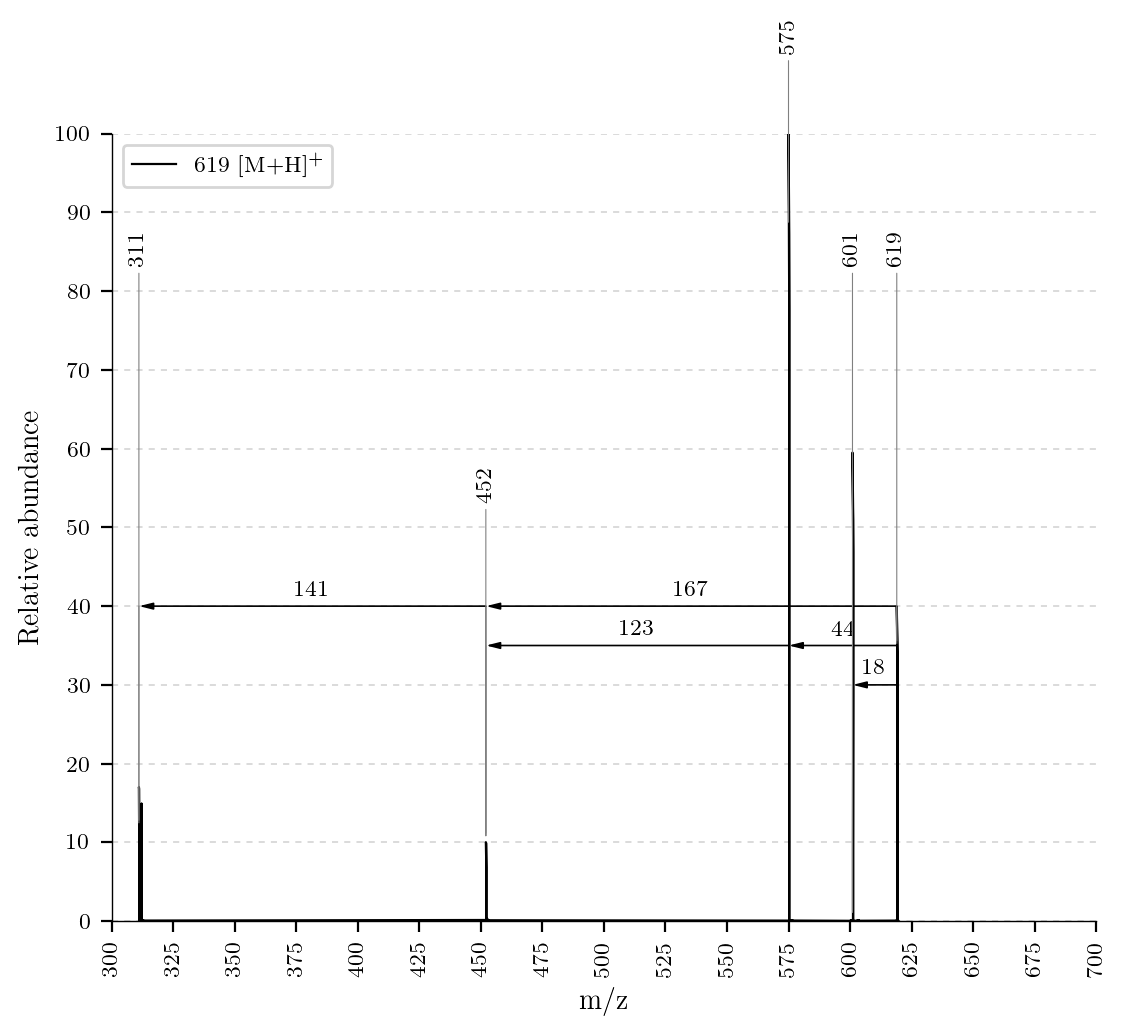

In [120]:
if __name__ == "__main__":
    # generate_massspectra_plot_automatic_labels("examples/inputs/substance1", "examples/ex1")

    generate_massspectra_plot_distance_peak_manual_annotation("data/raw/Kuerbis_Analyse_Bindungskinetik_Fragmente61927", "data/ex2")

    # generate_massspectra_two_plot_manual_annotation("examples/inputs/substance1","examples/inputs/substance2", "examples/ex3")